CA: spatially distributed dynamical system that is discrete in both space and time.

$$ s_{t+1}\left(x\right) = F\left( s_t\left(x+x_0\right), s_t\left(x+x_1\right), \ldots, s_t\left(x+x_{n-1}\right) \right) $$

where

* $x_0, x_1, \ldots, x_{n-1}$ is a neighborhood of location $x$
* $t$ is the current time step
* $s_t\left(x\right)$ is the state of an automaton located at $x$ and time $t$
* $F$ is the state-transition function

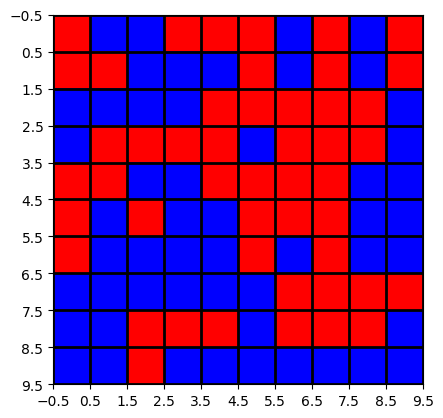

In [3]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0, 10, 20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-0.5, 10, 1))
ax.set_yticks(np.arange(-0.5, 10, 1))

plt.show()

In [38]:
n_steps = 4
sz = 16
# data = np.random.randint(2, size=(1+n_steps,10))
data = np.zeros((n_steps+1, 16), dtype=int)
data[0,:] = [1, 0, 1, 1, 0, 0, 1, 0 , 1, 1, 0, 0, 1, 0 ,1, 0]
for n in range(n_steps):
    for k in range(0, sz):
        # boundary conditions
        if k == 0:
            s = data[n, 1] + data[n, 0] + data[n,-1]
        elif k == sz-1:
            s = data[n,0] + data[n,sz-1] + data[n,sz-2]
        else:
            s = np.sum(data[n, k-1:k+2])
        data[n+1, k] = np.round(s / 3)

data

array([[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1]])

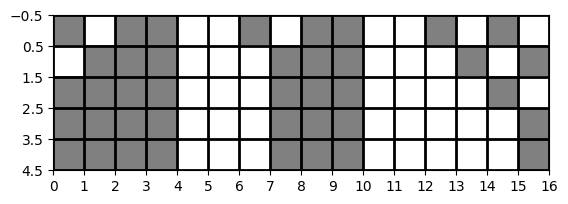

In [49]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

# data = np.random.randint(2, size=(1,10))

# create discrete colormap
cmap = colors.ListedColormap(['white', 'gray'])
bounds = [0, 1, 2]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-0.5, sz, 1))
ax.set_xticklabels(range(0,sz+1))
ax.set_yticks(np.arange(-0.5, 5, 1))

plt.show()

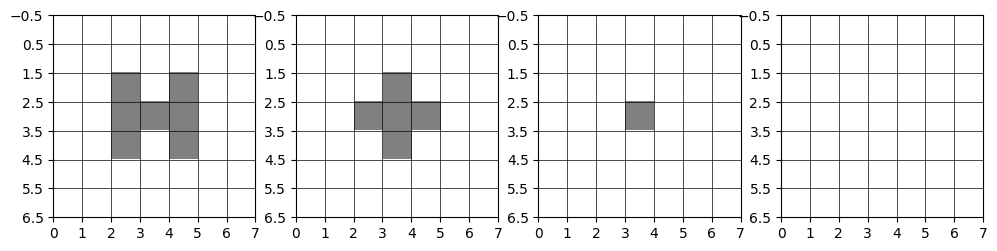

In [64]:
n_steps = 4
sz = 7

data = np.zeros((sz, sz, 4), dtype=int)
data[2,2,0] = 1
data[2,4,0] = 1
data[3,2,0] = 1
data[3,3,0] = 1
data[3,4,0] = 1
data[4,2,0] = 1
data[4,4,0] = 1


# von Neumann neighborhoods
for n in range(0, 3):
    for i in range(0, sz):
        for j in range(0, sz):
            s = data[i,j,n]
            # y-direction
            if i == 0:
                s += data[i+1,j,n] + data[-1,j,n]
            elif i == sz-1:
                s += data[0,j,n] + data[i-1,j,n]
            else:
                s += data[i+1, j,n] + data[i-1,j,n]

            # x-direction
            if j == 0:
                s += data[i,j+1,n] + data[i,-1,n]
            elif j == sz-1:
                s += data[i,j-1,n] + data[i,0,n]
            else:
                s += data[i,j-1,n] + data[i,j+1,n]
            
            data[i,j,n+1] = np.round(s / 5)



cmap = colors.ListedColormap(['white', 'gray'])
bounds = [0, 1, 2]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(12,3), ncols=4)
for i in range(4):
    ax[i].imshow(data[:,:,i], cmap=cmap, norm=norm)
    # draw gridlines
    ax[i].grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.5)
    ax[i].set_xticks(np.arange(-0.5, sz, 1))
    ax[i].set_xticklabels(range(0,sz+1))
    ax[i].set_yticks(np.arange(-0.5, sz, 1))